In [3]:
# ------ Imports & data ------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
# df = pd.read_csv("data/raw/TMDB_movie_dataset_v11.csv")
df = pd.read_csv('data/processed/100k_subset.csv', usecols=['title', 'budget', 'revenue'])
df.dropna(inplace=True)
mask = (df['revenue'] == 0) & (df['budget'] == 0)
df = df.loc[~mask]
df = df.reset_index(drop=True)
print(df.size)

18300


In [4]:
# ------ Handling Outliers ------
df = df[(df['budget'] >= 1000) & (df['revenue'] >= 1000)].copy()
budget_cap = df['budget'].quantile(0.95)
revenue_cap = df['revenue'].quantile(0.95)
df = df[df['budget'] <= budget_cap]
df = df[df['revenue'] <= revenue_cap]

In [5]:
# ------ Does Budget and Revenue correlate? ------
df.describe()

,revenue,budget
count,8.620000e+02,8.620000e+02
mean,2.720810e+07,1.299210e+07
std,4.966927e+07,1.888085e+07
min,1.000000e+03,1.000000e+03
25%,4.262405e+05,4.896762e+05
50%,5.062391e+06,5.000000e+06
75%,2.958847e+07,1.800000e+07
max,3.106506e+08,1.000000e+08


In [6]:
# ------ Pearson Correlation Coefficient ------
print(df.corr(numeric_only=True))

          revenue    budget
revenue  1.000000  0.650182
budget   0.650182  1.000000


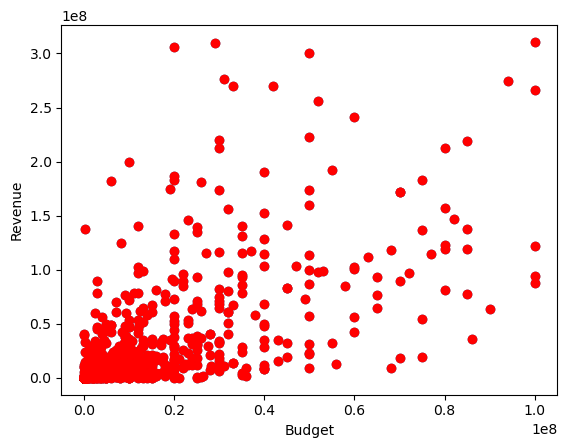

In [7]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.plot(df['budget'], df['revenue'], "ro")

## Interpretation: "Pearson Correlation Coefficient"
The correlation matrix shows, that there is a strong relationship
between budget and revenue. This suggests, that higher budgeted productions
generate more revenue at the box offices.

(It is obvious, that the quality of the data is lacking and therefor might
distort the values. There are data instances where production OR revenue is 0.00)

Training Metrics:
MAE: 21701780.01
RMSE: 38128495.41
R-squared: 0.4418

Test Metrics:
MAE: 18619855.82
RMSE: 36282139.98
R-squared: 0.3006


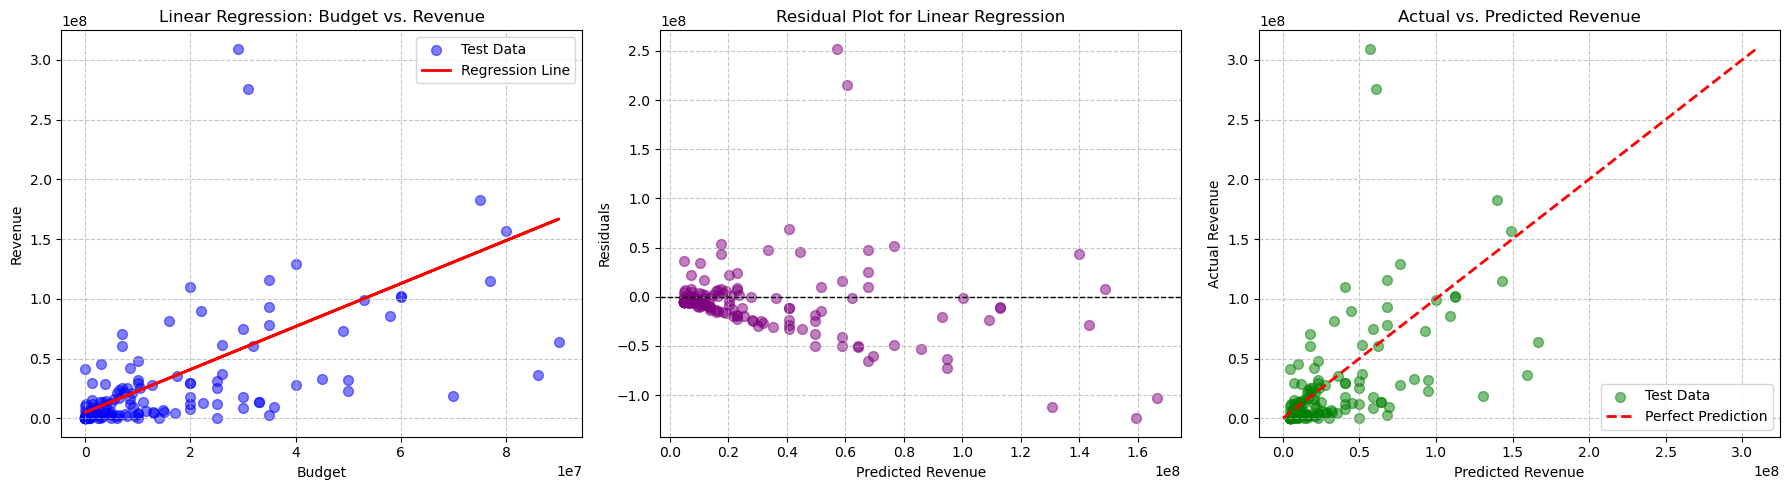

In [8]:
# ------ Linear Regression ------

X = df[["budget"]]
y = df["revenue"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R-squared: {train_r2:.4f}")
print("\nTest Metrics:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R-squared: {test_r2:.4f}")
import matplotlib.pyplot as plt

# Setting up 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residuals aka Error
residuals = y_test - y_test_pred

x_label = 'Budget'
y_label = 'Revenue'

# Plot 1: Scatter with Regression Line
axes[0].scatter(X_test, y_test, color='blue', alpha=0.5, s=50, label='Test Data')
axes[0].plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
axes[0].set_xlabel(x_label)
axes[0].set_ylabel(y_label)
axes[0].set_title('Linear Regression: Budget vs. Revenue')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot 2: Residual Plot
axes[1].scatter(y_test_pred, residuals, color='purple', alpha=0.5, s=50)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel(f'Predicted {y_label}')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot for Linear Regression')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot 3: Actual vs. Predicted
axes[2].scatter(y_test_pred, y_test, color='green', alpha=0.5, s=50, label='Test Data')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
axes[2].set_xlabel(f'Predicted {y_label}')
axes[2].set_ylabel(f'Actual {y_label}')
axes[2].set_title('Actual vs. Predicted Revenue')
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Interpretation: Linear Regression Model: x=Budget y=Revenue
Even though there is a strong correlation coefficient between *budget* and *revenue*, a linear regression model is not sufficient to capture the overall relationship. The R-squared value indicates that the budget explains only a small fraction of the variance in revenue.

**Outliers**: Previously, movies with very high revenues or budgets were significantly impacting the regression analysis. After implementing outlier handling by filtering and capping the data, the model's performance has improved, and the plots are now more interpretable. This allows for a more accurate assessment of the relationship between budget and revenue for the majority of films.

Further exploration could be:
- [ ] Fitting polynomial functions onto the data to capture non-linear relationships.
- [ ] Incorporating other features to build a more comprehensive predictive model.